In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
# Step 1: Generate sample data
def true_function(x):
    return np.sin(2 * np.pi * x)

np.random.seed(42)
n_samples = 20
X = np.linspace(0, 1, n_samples)
y = true_function(X) + np.random.normal(0, 0.1, n_samples)

In [6]:
# Step 2: Cluster centroids initialization using k-means algorithm
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X.reshape(-1, 1))
centroids = kmeans.cluster_centers_.ravel()

C:\ProgramData\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
# Step 3: Compute the average distance between each pair of centroids to determine the width of the radial basis functions
widths = np.mean(np.abs(centroids[:, np.newaxis] - centroids)) / 2

In [8]:
# Step 4: Implement the RBF activation function
def rbf(x, center, width):
    distance = np.abs(x - center)
    return np.exp(-0.5 * (distance / width) ** 2)

In [9]:
# Step 5: Implement the LMS algorithm for weight adjustment
def lms(X, y, weights, centers, widths, learning_rate=0.1, max_iterations=1000):
    n_samples = len(X)
    n_centers = len(centers)

    for _ in range(max_iterations):
       
        activations = np.array([rbf(X[i], centers, widths) for i in range(n_samples)])
        predictions = np.dot(activations, weights)
        error = y - predictions
        weights += learning_rate * np.dot(activations.T, error)

    return weights

In [10]:
# Step 6: Initialize weights randomly
weights = np.random.randn(k)

In [11]:

# Step 7: Train the RBF network using the LMS algorithm
weights = lms(X, y, weights, centroids, widths)


In [12]:
# Step 8: Make predictions on test data
x_test = np.linspace(0, 1, 100)
y_pred = np.dot(np.array([rbf(x_test[i], centroids, widths) for i in range(len(x_test))]), weights)


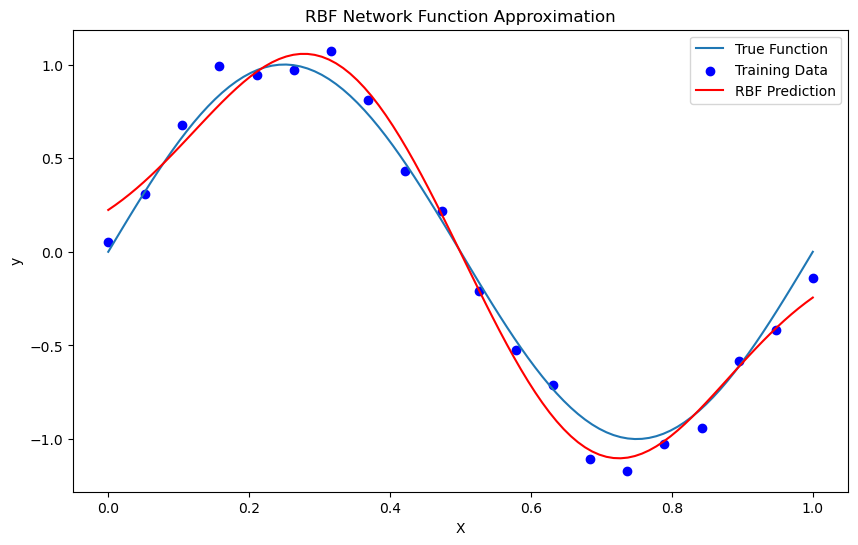

In [15]:
# Step 9: Plot the true function, training data, and predicted function
plt.figure(figsize=(10, 6))
plt.plot(x_test, true_function(x_test), label='True Function')
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(x_test, y_pred, color='red', label='RBF Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('RBF Network Function Approximation')
plt.legend()
plt.show()